In [3]:
# a "side" notebook we used to find classical solutions to MIS problems via GenericTensorNetworks on Julia.

using Bloqade
using Graphs
using Random
using GenericTensorNetworks
using Optim
using PythonCall
plt = pyimport("matplotlib.pyplot");

   Resolving package versions...
  No Changes to `/opt/.julia/environments/v1.9/Project.toml`
  No Changes to `/opt/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
   Installed BatchedRoutines ─────────── v0.2.2
   Installed Mods ────────────────────── v1.3.4
   Installed AbstractFFTs ────────────── v1.5.0
   Installed FFTW ────────────────────── v1.8.0
   Installed GenericTensorNetworks ───── v1.4.0
   Installed FFTW_jll ────────────────── v3.3.10+0
   Installed Suppressor ──────────────── v0.2.6
   Installed Combinatorics ───────────── v1.0.2
   Installed AbstractTrees ───────────── v0.4.4
   Installed BetterExp ───────────────── v0.1.0
   Installed TropicalNumbers ─────────── v0.6.2
   Installed OMEinsumContractionOrders ─ v0.8.3
   Installed Polynomials ─────────────── v4.0.6
   Installed OMEinsum ────────────────── v0.7.6
    Updating `/opt/.julia/environments/v1.9/Project.toml`
⌃ [3521c873] + GenericTensorNetworks v1.4.0
    Updating `/opt/.julia/environm

LoadError: ArgumentError: Package Optim not found in current path.
- Run `import Pkg; Pkg.add("Optim")` to install the Optim package.

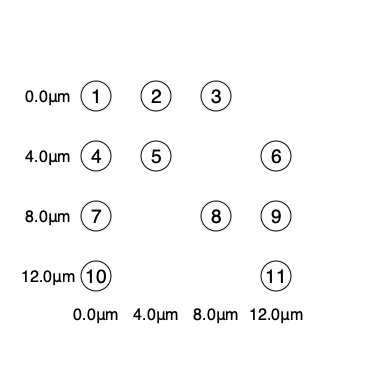

In [211]:
Random.seed!()
atoms = generate_sites(SquareLattice(), 9, 9; scale = 4) |> random_dropout(0.3)

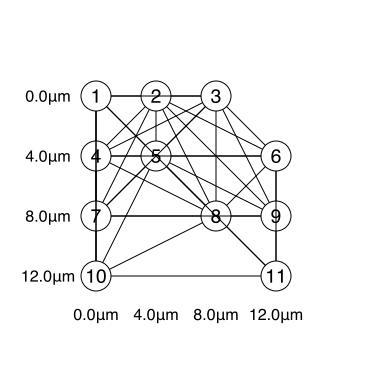

In [212]:
Bloqade.plot(atoms, blockade_radius = 12.3)


In [239]:
graph = BloqadeMIS.unit_disk_graph(atoms, 12.3)
mis_size_and_counting = GenericTensorNetworks.solve(IndependentSet(graph), ConfigsMax())[]

LoadError: BoundsError: attempt to access CountingTropical{Float64, ConfigEnumerator{11, 1, 1}} at index [0]

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]5.9


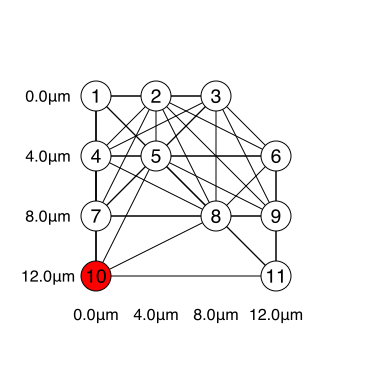

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]5.922629525219384


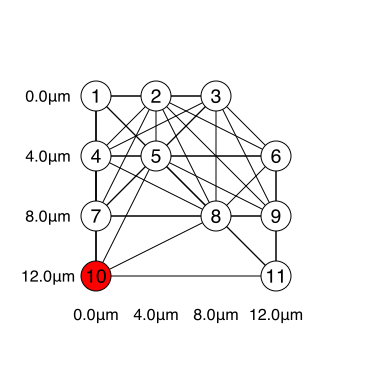

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]5.945259050438768


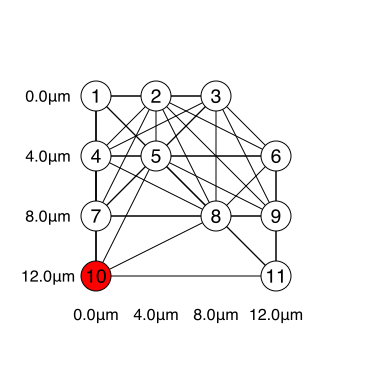

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]5.967888575658153


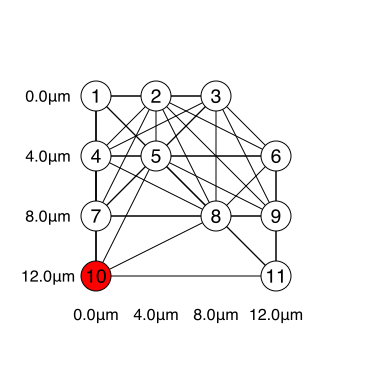

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]5.9905181008775354


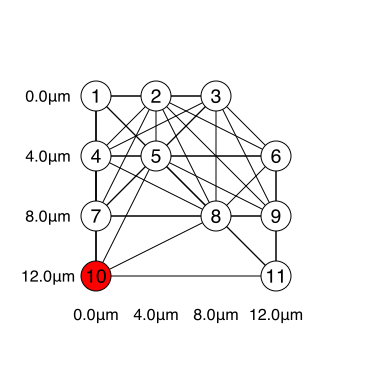

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]6.01314762609692


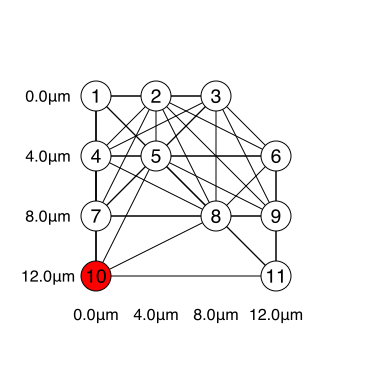

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]6.035777151316303


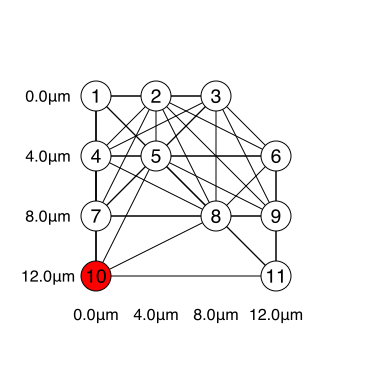

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]6.058406676535688


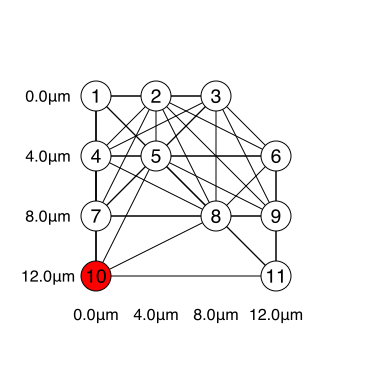

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]6.081036201755071


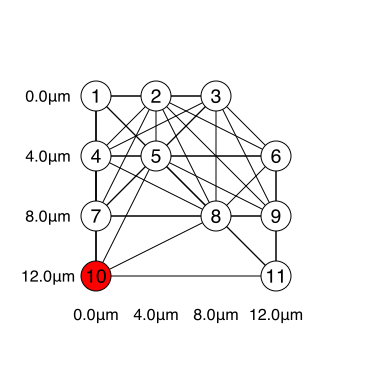

DitStr{2, 11, Int64}[01000000000 ₍₂₎, 10000010000 ₍₂₎]6.103665726974455


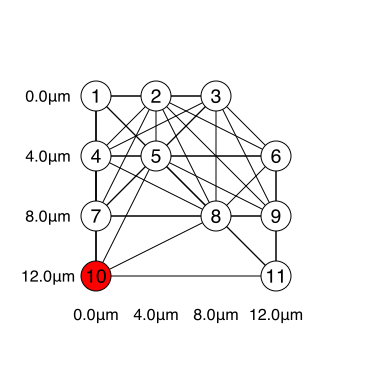

In [218]:
#contants
rb = sqrt(3*sqrt(10))*4
C = 2*π*862690
omega_vals = LinRange(5.9,6.103665726974455,10) # 5.9,6.103665726974455

results = zeros(0,2)

# parameters
for i in omega_vals
    T_max = 0.6
    Ω_max = i
    Ω = piecewise_linear(clocks = [0.0, 0.05, 0.55, T_max], values = [0.0, Ω_max, Ω_max, 0])
    Δ_end = (C/(rb^6))
    Δ_start = -Δ_end
    Δ = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [Δ_start, Δ_start, Δ_end, Δ_end])
    
    hamiltonian = rydberg_h(atoms; Ω = Ω, Δ = Δ)
    prob = SchrodingerProblem(zero_state(nqubits(hamiltonian)), T_max, hamiltonian)
    emulate!(prob)
    
    best_bit_strings = most_probable(prob.reg, 2)
    all_optimal_configs = GenericTensorNetworks.solve(IndependentSet(graph), ConfigsMax())[]
    
    best_bit_strings = most_probable(prob.reg, 2)
    
    println(best_bit_strings, i)
    display(Bloqade.plot(atoms, blockade_radius = 12.3; colors = [iszero(b) ? "white" : "red" for b ∈ best_bit_strings[1]]))
end
# fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
# Bloqade.plot!(ax1, Ω)
# ax1.set_ylabel("Ω/2π (MHz)")
# Bloqade.plot!(ax2, Δ)
# ax2.set_ylabel("Δ/2π (MHz)")
# fig

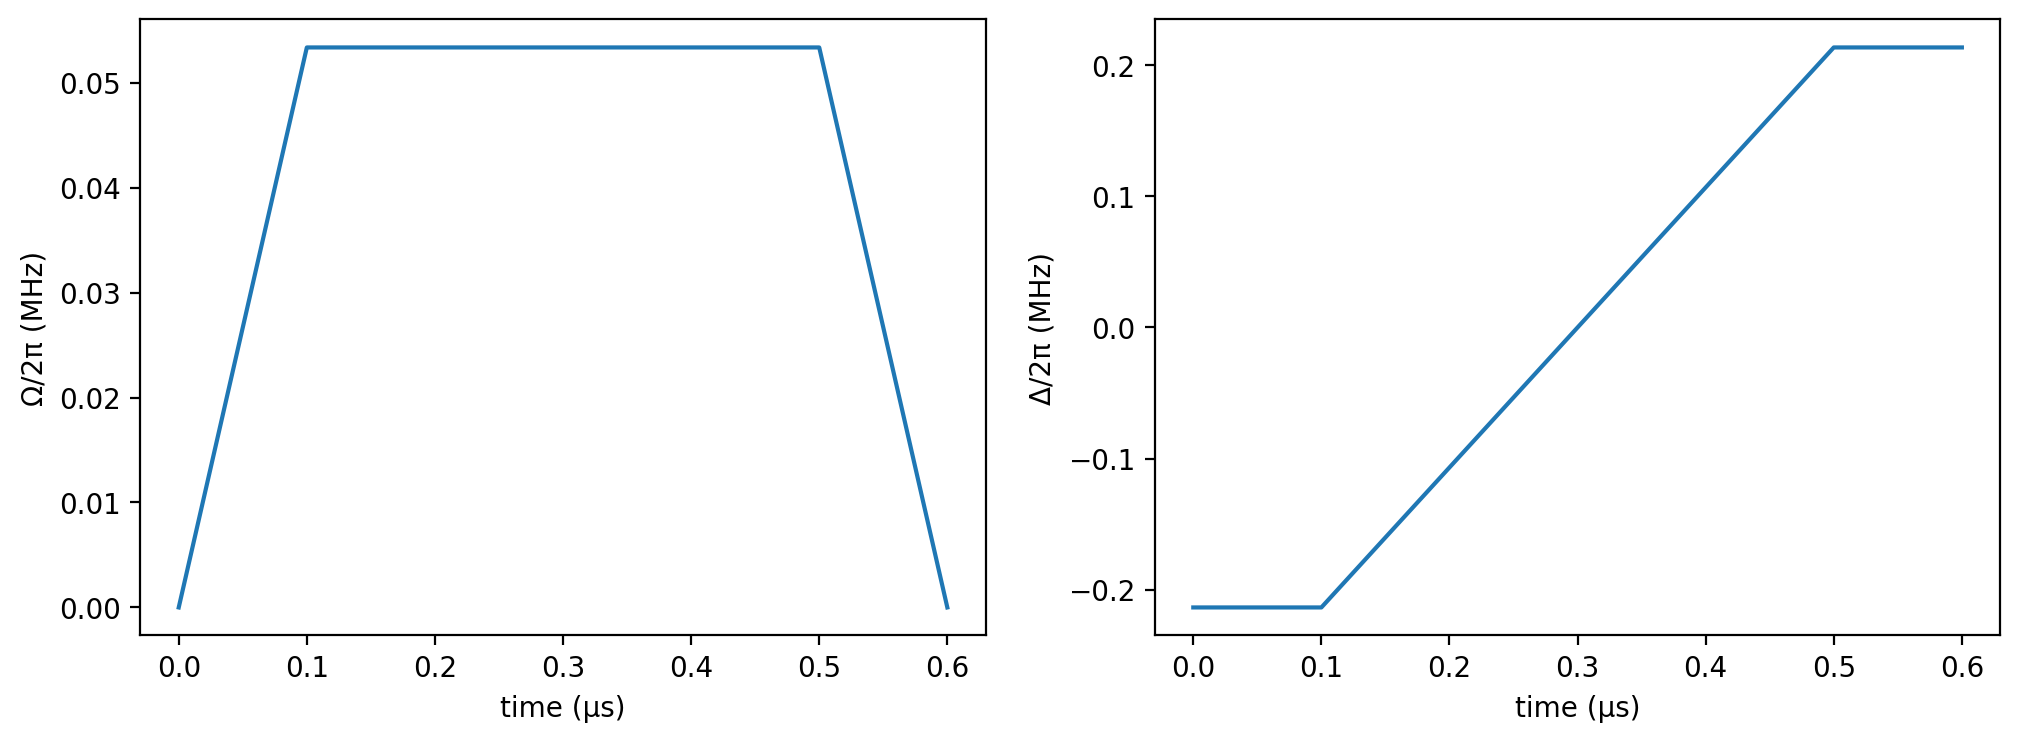

In [170]:
#contants
rb = sqrt(3*sqrt(10))*4
C = 2*π*862690
omega_vals = LinRange(0.1*2pi,0.7*2pi,20)
results = zeros(0,2)

# parameters
T_max = 0.6
Ω_max = 0.05335783*2pi
Ω = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [0.0, Ω_max, Ω_max, 0])
Δ_end = 0.213431*2pi
Δ_start = -Δ_end
Δ = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [Δ_start, Δ_start, Δ_end, Δ_end])
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

In [171]:
hamiltonian = rydberg_h(atoms; Ω = Ω, Δ = Δ)
prob = SchrodingerProblem(zero_state(nqubits(hamiltonian)), T_max, hamiltonian)
emulate!(prob)


SchrodingerProblem:
  register info:
    type: ArrayReg{2, ComplexF64, Matrix{ComplexF64}}
    storage size: 8 bytes

  time span (μs): (0.0, 0.6)

  equation: 
    storage size: 3.625 MiB
    expression:
nqubits: 14
+
├─ [+] ∑ 2π ⋅ 8.627e5.0/|x_i-x_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


    algorithm: DP8(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false),)
  options:
    save_everystep: false
    save_start: false
    save_on: false
    dense: false
    reltol: 1.0e-10
    abstol: 1.0e-10
    alias_u0: true


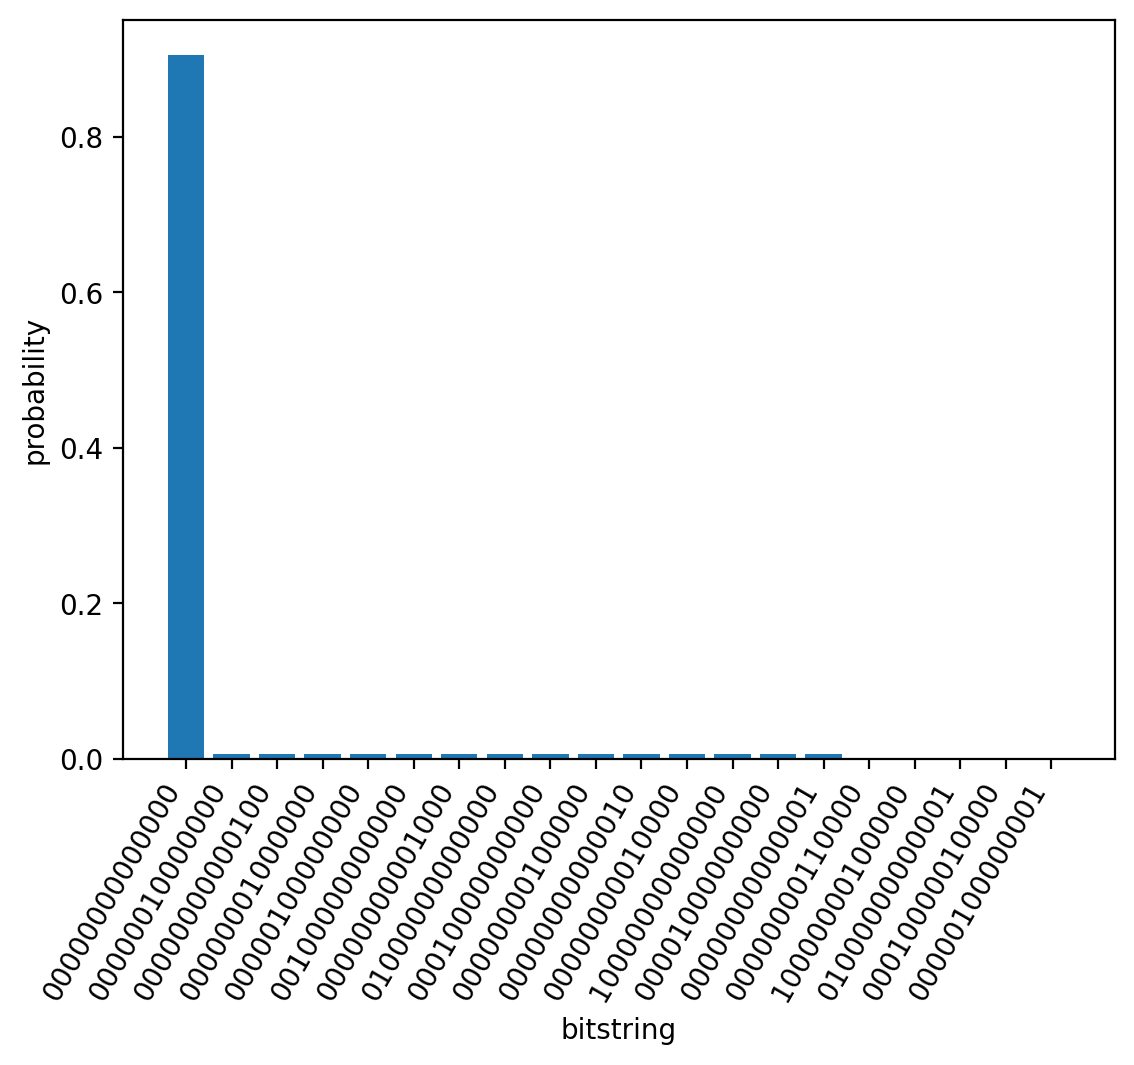

In [172]:
bitstring_hist(prob.reg; nlargest = 20)

In [173]:
best_bit_strings = most_probable(prob.reg, 2)
all_optimal_configs = GenericTensorNetworks.solve(IndependentSet(graph), ConfigsMax())[]
@assert all(bs -> GenericTensorNetworks.StaticBitVector([bs...]) ∈ all_optimal_configs.c, best_bit_strings)

LoadError: AssertionError: all((bs->begin
            #= In[173]:3 =#
            GenericTensorNetworks.StaticBitVector([bs...]) ∈ all_optimal_configs.c
        end), best_bit_strings)

In [174]:
best_bit_strings = most_probable(prob.reg, 2)

2-element Vector{DitStr{2, 14, Int64}}:
 00000000000000 ₍₂₎
 00000010000000 ₍₂₎

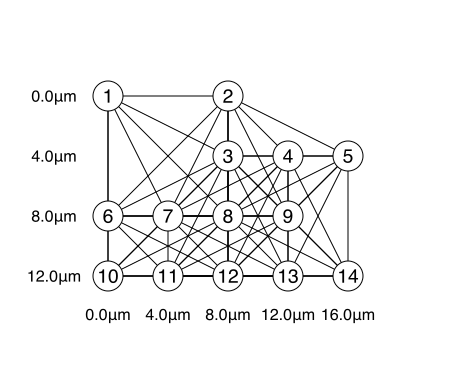

In [175]:
Bloqade.plot(atoms, blockade_radius = 12.3; colors = [iszero(b) ? "white" : "red" for b ∈ best_bit_strings[1]])
